# 運動学的方程式の導出 （クォータニオン）

吉田勝俊（宇都宮大学）

## 参考情報
- [SymPyで代数演算してみる - Qiita](https://qiita.com/zawawahoge/items/1be137a8147902a5e6cb)
- [Matrices (linear algebra) &#8212; SymPy 1.6.2 documentation](https://docs.sympy.org/latest/modules/matrices/matrices.html)

In [ ]:
import sympy as sym #数式処理ライブラリ
sym.init_printing() #数式を綺麗に表示する設定

## Sympy 変数・関数

In [ ]:
om1, om2, om3 = sym.symbols('\omega_1 \omega_2 \omega_3')
q0, q1, q2, q3 = sym.symbols('q0 q1 q2 q3', Real=True, positive=True)
dq0, dq1, dq2, dq3 = sym.symbols('\dot{q}_0 \dot{q}_1 \dot{q}_2 \dot{q}_3', Real=True, positive=True)

In [ ]:
q = sym.Matrix([q0,q1,q2,q3]) #オイラーパラメータ
dq = sym.Matrix([dq0,dq1,dq2,dq3]) #その時間微分

display(q)
display(dq)

⎡q₀⎤
⎢  ⎥
⎢q₁⎥
⎢  ⎥
⎢q₂⎥
⎢  ⎥
⎣q₃⎦

⎡\dot{q}₀⎤
⎢        ⎥
⎢\dot{q}₁⎥
⎢        ⎥
⎢\dot{q}₂⎥
⎢        ⎥
⎣\dot{q}₃⎦

#### テスト

In [ ]:
q.dot(dq)

## クォータニオンによる回転行列

In [ ]:
Rot = sym.Matrix([
    [ 1 -2*q2**2 -2*q3**2,    2*q1*q2 -2*q0*q3, 2*q0*q2 +2*q1*q3],
    [ 2*q1*q2 +2*q0*q3, 1 -2*q1**2 -2*q3**2,   -2*q0*q1 +2*q2*q3],
    [-2*q0*q2 +2*q1*q3, 2*q0*q1 +2*q2*q3, 1 -2*q1**2 -2*q2**2]
])
Rot

⎡      2       2                                              ⎤
⎢- 2⋅q₂  - 2⋅q₃  + 1  -2⋅q₀⋅q₃ + 2⋅q₁⋅q₂    2⋅q₀⋅q₂ + 2⋅q₁⋅q₃ ⎥
⎢                                                             ⎥
⎢                           2       2                         ⎥
⎢ 2⋅q₀⋅q₃ + 2⋅q₁⋅q₂   - 2⋅q₁  - 2⋅q₃  + 1  -2⋅q₀⋅q₁ + 2⋅q₂⋅q₃ ⎥
⎢                                                             ⎥
⎢                                                2       2    ⎥
⎣-2⋅q₀⋅q₂ + 2⋅q₁⋅q₃    2⋅q₀⋅q₁ + 2⋅q₂⋅q₃   - 2⋅q₁  - 2⋅q₂  + 1⎦

### 回転行列の時間微分

In [ ]:
def sympy_dt_param(expr, param_vec, dparam_vec):
    """
    パラメータを時間の関数として時間微分する関数
        param_vec: パラメータベクトル sympy.Matrix([sympyのシンボル達]) 
        dparam_vec: パラメータベクトルの微分 sympy.Matrix([sympyのシンボル達])
    """
    dim = len(param_vec)
    result = expr
   
    # 仮の時間変数
    t = sym.symbols('t')

    # パラメータを時間関数で置換
    func_vec = []
    for i in range(dim):
        lab = 'param' + str(i) #仮の変数表示名
        fun = sym.symbols(lab, cls=sym.Function, Real=True)
        func_vec.append( fun(t) )

    func_vec = sym.Matrix(func_vec) #sympy型へ変換
    
    for i in range(dim):
        result = result.replace(param_vec[i],func_vec[i])

    # 時間微分を実行
    result = result.diff()
    dfunc_vec = func_vec.diff()
    
    # 時間関数を元のパラメータに戻す
    for i in range(dim):
        result = result.replace(dfunc_vec[i], dparam_vec[i])
        result = result.replace(func_vec[i], param_vec[i])

    return result

回転行列を実際に時間微分する

In [ ]:
dRot = sympy_dt_param(Rot, q, dq)
dRot

⎡                -4⋅\dot{q}₂⋅q₂ - 4⋅\dot{q}₃⋅q₃                  -2⋅\dot{q}₀⋅q
⎢                                                                             
⎢2⋅\dot{q}₀⋅q₃ + 2⋅\dot{q}₁⋅q₂ + 2⋅\dot{q}₂⋅q₁ + 2⋅\dot{q}₃⋅q₀                
⎢                                                                             
⎣-2⋅\dot{q}₀⋅q₂ + 2⋅\dot{q}₁⋅q₃ - 2⋅\dot{q}₂⋅q₀ + 2⋅\dot{q}₃⋅q₁  2⋅\dot{q}₀⋅q₁

₃ + 2⋅\dot{q}₁⋅q₂ + 2⋅\dot{q}₂⋅q₁ - 2⋅\dot{q}₃⋅q₀  2⋅\dot{q}₀⋅q₂ + 2⋅\dot{q}₁⋅
                                                                              
   -4⋅\dot{q}₁⋅q₁ - 4⋅\dot{q}₃⋅q₃                  -2⋅\dot{q}₀⋅q₁ - 2⋅\dot{q}₁
                                                                              
 + 2⋅\dot{q}₁⋅q₀ + 2⋅\dot{q}₂⋅q₃ + 2⋅\dot{q}₃⋅q₂                   -4⋅\dot{q}₁

q₃ + 2⋅\dot{q}₂⋅q₀ + 2⋅\dot{q}₃⋅q₁ ⎤
                                   ⎥
⋅q₀ + 2⋅\dot{q}₂⋅q₃ + 2⋅\dot{q}₃⋅q₂⎥
                                   ⎥
⋅q₁ - 4⋅\dot{q}₂⋅q₂                ⎦

### 回転行列の逆行列

In [ ]:
invRot = Rot.transpose() #回転行列なので転置で求まる
invRot

⎡      2       2                                              ⎤
⎢- 2⋅q₂  - 2⋅q₃  + 1   2⋅q₀⋅q₃ + 2⋅q₁⋅q₂   -2⋅q₀⋅q₂ + 2⋅q₁⋅q₃ ⎥
⎢                                                             ⎥
⎢                           2       2                         ⎥
⎢-2⋅q₀⋅q₃ + 2⋅q₁⋅q₂   - 2⋅q₁  - 2⋅q₃  + 1   2⋅q₀⋅q₁ + 2⋅q₂⋅q₃ ⎥
⎢                                                             ⎥
⎢                                                2       2    ⎥
⎣ 2⋅q₀⋅q₂ + 2⋅q₁⋅q₃   -2⋅q₀⋅q₁ + 2⋅q₂⋅q₃   - 2⋅q₁  - 2⋅q₂  + 1⎦

### 角速度ベクトルの外積行列 $[\boldsymbol{\omega}\times]:=R^{-1}\dot{R}$

In [ ]:
OMcross = sym.simplify(invRot*dRot)

### 外積行列 $[\boldsymbol{\omega}\times]:=R^{-1}\dot{R}$ から角速度ベクトル $\boldsymbol{\omega}$ を抽出

In [ ]:
OMvec = sym.Matrix([OMcross[2,1],OMcross[0,2],OMcross[1,0]])
OMvec

⎡                                                                             
⎢8⋅(\dot{q}₁⋅q₁ + \dot{q}₃⋅q₃)⋅(q₀⋅q₁ - q₂⋅q₃) - 4⋅(q₀⋅q₂ + q₁⋅q₃)⋅(\dot{q}₀⋅q
⎢                                                                             
⎢                                                                             
⎢8⋅(\dot{q}₁⋅q₁ + \dot{q}₂⋅q₂)⋅(q₀⋅q₂ - q₁⋅q₃) - 4⋅(q₀⋅q₃ + q₁⋅q₂)⋅(\dot{q}₀⋅q
⎢                                                                             
⎢                                                                             
⎣8⋅(\dot{q}₂⋅q₂ + \dot{q}₃⋅q₃)⋅(q₀⋅q₃ - q₁⋅q₂) - 4⋅(q₀⋅q₁ + q₂⋅q₃)⋅(\dot{q}₀⋅q

                                                 ⎛    2       2    ⎞          
₃ - \dot{q}₁⋅q₂ - \dot{q}₂⋅q₁ + \dot{q}₃⋅q₀) - 2⋅⎝2⋅q₁  + 2⋅q₂  - 1⎠⋅(\dot{q}₀
                                                                              
                                                 ⎛    2       2    ⎞          
₁ + \dot{q}₁⋅q₀ - \dot{q}₂⋅q₃ - \dot{q}₃⋅q₂) - 2⋅⎝2

### 行列表示 $\boldsymbol{\omega}=\Omega \dot{\boldsymbol{q}}$ の表現行列 $\Omega$

- 線形変換のヤコビ行列＝表現行列なので，ヤコビ行列を求める関数 [jacobian(X)](https://docs.sympy.org/latest/modules/matrices/matrices.html#sympy.matrices.matrices.MatrixCalculus.jacobian) を流用しました．
- $q_0$, $q_1$, $q_2$, $q_3$ が拘束条件下 $q_0^2+q_1^2+q_2^2+q_3^2=1$ で独立でなく，sympy の `simplify` のクセと相まって，以下の簡約化は危うい均衡状態にあります．ちょっと変えると，式形が変わります（数学的には等価だが）．

In [ ]:
tmp = OMvec
tmp = sym.Matrix([
    tmp[0].replace(q1, sym.sqrt(1-(q0**2 +q2**2 +q3**2))),
    tmp[1].replace(q2, sym.sqrt(1-(q0**2 +q1**2 +q3**2))),
    tmp[2].replace(q3, sym.sqrt(1-(q0**2 +q1**2 +q2**2))),
])
tmp = tmp.jacobian(dq)
tmp = sym.simplify(tmp)
tmp = tmp.replace(1, (q0**2 +q1**2 +q2**2 +q3**2))
tmp = sym.MutableMatrix(tmp)
# 綺麗にならない成分を微調整
tmp2 = tmp[0,1]
tmp2 = tmp2.replace(q0, sym.sqrt(1-(q1**2 +q2**2 +q3**2)))
tmp2 = sym.simplify(tmp2)
tmp2 = tmp2.replace(1, (q0**2 +q1**2 +q2**2 +q3**2))
tmp[0,1] = tmp2
# 綺麗にならない成分を微調整
tmp2 = tmp[1,2]
tmp2 = tmp2.replace(q0, sym.sqrt(1-(q1**2 +q2**2 +q3**2)))
tmp2 = sym.simplify(tmp2)
tmp2 = tmp2.replace(1, (q0**2 +q1**2 +q2**2 +q3**2))
tmp[1,2] = tmp2
# 綺麗にならない成分を微調整
tmp2 = tmp[2,3]
tmp2 = tmp2.replace(q0, sym.sqrt(1-(q1**2 +q2**2 +q3**2)))
tmp2 = sym.simplify(tmp2)
tmp2 = tmp2.replace(1, (q0**2 +q1**2 +q2**2 +q3**2))
tmp[2,3] = tmp2
OMmat = tmp
OMmat

⎡    2                                2                                       
⎢4⋅q₀ ⋅q₁ - 4⋅q₀⋅q₂⋅q₃ - 2⋅q₁  4⋅q₀⋅q₁  + 2⋅q₀ - 4⋅q₁⋅q₂⋅q₃  4⋅q₀⋅q₁⋅q₂ - 4⋅q₂
⎢                                                                             
⎢    2                                          2                   2         
⎢4⋅q₀ ⋅q₂ - 4⋅q₀⋅q₁⋅q₃ - 2⋅q₂  4⋅q₀⋅q₁⋅q₂ - 4⋅q₁ ⋅q₃ - 2⋅q₃  4⋅q₀⋅q₂  + 2⋅q₀ -
⎢                                                                             
⎢    2                                          2                             
⎣4⋅q₀ ⋅q₃ - 4⋅q₀⋅q₁⋅q₂ - 2⋅q₃  4⋅q₀⋅q₁⋅q₃ - 4⋅q₁ ⋅q₂ + 2⋅q₂  4⋅q₀⋅q₂⋅q₃ - 4⋅q₁

2                                2       ⎤
 ⋅q₃ + 2⋅q₃  4⋅q₀⋅q₁⋅q₃ - 4⋅q₂⋅q₃  - 2⋅q₂⎥
                                         ⎥
                                 2       ⎥
 4⋅q₁⋅q₂⋅q₃  4⋅q₀⋅q₂⋅q₃ - 4⋅q₁⋅q₃  + 2⋅q₁⎥
                                         ⎥
   2                2                    ⎥
⋅q₂  - 2⋅q₁  4⋅q₀⋅q₃  + 2⋅q₀ - 4⋅q₁⋅q₂⋅q₃⎦

### LaTeXソースの出力

In [ ]:
print(sym.latex(OMmat))

\left[\begin{matrix}4 q_{0}^{2} q_{1} - 4 q_{0} q_{2} q_{3} - 2 q_{1} & 4 q_{0} q_{1}^{2} + 2 q_{0} - 4 q_{1} q_{2} q_{3} & 4 q_{0} q_{1} q_{2} - 4 q_{2}^{2} q_{3} + 2 q_{3} & 4 q_{0} q_{1} q_{3} - 4 q_{2} q_{3}^{2} - 2 q_{2}\\4 q_{0}^{2} q_{2} - 4 q_{0} q_{1} q_{3} - 2 q_{2} & 4 q_{0} q_{1} q_{2} - 4 q_{1}^{2} q_{3} - 2 q_{3} & 4 q_{0} q_{2}^{2} + 2 q_{0} - 4 q_{1} q_{2} q_{3} & 4 q_{0} q_{2} q_{3} - 4 q_{1} q_{3}^{2} + 2 q_{1}\\4 q_{0}^{2} q_{3} - 4 q_{0} q_{1} q_{2} - 2 q_{3} & 4 q_{0} q_{1} q_{3} - 4 q_{1}^{2} q_{2} + 2 q_{2} & 4 q_{0} q_{2} q_{3} - 4 q_{1} q_{2}^{2} - 2 q_{1} & 4 q_{0} q_{3}^{2} + 2 q_{0} - 4 q_{1} q_{2} q_{3}\end{matrix}\right]


### $\Omega(\boldsymbol{q},\dot{\boldsymbol{q}})$ を $\dot{\boldsymbol{q}}$ について解き，運動学的方程式 $\dot{\boldsymbol{q}}=K(\boldsymbol{q},\boldsymbol{\omega})$ を導く

#### $\dot{\boldsymbol{q}}$ について解く
（注）若干，計算に時間が掛かる場合があります．

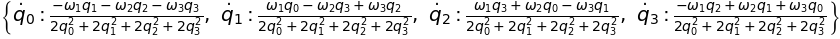

In [ ]:
var = dq
oms = sym.Matrix([om1, om2, om3])
equation1 = OMmat*var - oms
equation2 = q.dot(dq)
equations = equation1.row_insert(3, sym.Matrix([equation2]))
result = sym.solve(equations, var)
result

#### 解から$K(\boldsymbol{q},\boldsymbol{\omega})$を作る

In [ ]:
tmp = sym.Matrix([result[dq[i]] for i in range(4)])
tmp = tmp.replace(q0, sym.sqrt(1-q1**2-q2**2-q3**2))
tmp = sym.simplify(tmp)
tmp = tmp.replace(1, q0**2+q1**2+q2**2+q3**2)
Kfunc = tmp
Kfunc

⎡  \omega₁⋅q₁   \omega₂⋅q₂   \omega₃⋅q₃⎤
⎢- ────────── - ────────── - ──────────⎥
⎢      2            2            2     ⎥
⎢                                      ⎥
⎢ \omega₁⋅q₀   \omega₂⋅q₃   \omega₃⋅q₂ ⎥
⎢ ────────── - ────────── + ────────── ⎥
⎢     2            2            2      ⎥
⎢                                      ⎥
⎢ \omega₁⋅q₃   \omega₂⋅q₀   \omega₃⋅q₁ ⎥
⎢ ────────── + ────────── - ────────── ⎥
⎢     2            2            2      ⎥
⎢                                      ⎥
⎢  \omega₁⋅q₂   \omega₂⋅q₁   \omega₃⋅q₀⎥
⎢- ────────── + ────────── + ──────────⎥
⎣      2            2            2     ⎦

### LaTeXソースの出力

In [ ]:
print(sym.latex(2*Kfunc))

\left[\begin{matrix}- \omega_{1} q_{1} - \omega_{2} q_{2} - \omega_{3} q_{3}\\\omega_{1} q_{0} - \omega_{2} q_{3} + \omega_{3} q_{2}\\\omega_{1} q_{3} + \omega_{2} q_{0} - \omega_{3} q_{1}\\- \omega_{1} q_{2} + \omega_{2} q_{1} + \omega_{3} q_{0}\end{matrix}\right]


## 運動学的方程式 $\dot{\boldsymbol{q}}=K(\boldsymbol{q},\boldsymbol{\omega})$ の行列表示

- 線形変換 $K(\boldsymbol{q},\boldsymbol{\omega})$ のヤコビ行列＝表現行列なので，ヤコビ行列を求める関数 [jacobian(X)](https://docs.sympy.org/latest/modules/matrices/matrices.html#sympy.matrices.matrices.MatrixCalculus.jacobian) を流用しました．

### $\dot{\boldsymbol{q}} = K_{\omega}\boldsymbol{q}$ 型の表現行列

In [ ]:
Kω = Kfunc.jacobian(q)
Kω

⎡         -\omega₁   -\omega₂   -\omega₃ ⎤
⎢   0     ─────────  ─────────  ─────────⎥
⎢             2          2          2    ⎥
⎢                                        ⎥
⎢\omega₁              \omega₃   -\omega₂ ⎥
⎢───────      0       ───────   ─────────⎥
⎢   2                    2          2    ⎥
⎢                                        ⎥
⎢\omega₂  -\omega₃               \omega₁ ⎥
⎢───────  ─────────      0       ─────── ⎥
⎢   2         2                     2    ⎥
⎢                                        ⎥
⎢\omega₃   \omega₂   -\omega₁            ⎥
⎢───────   ───────   ─────────      0    ⎥
⎣   2         2          2               ⎦

### $\dot{\boldsymbol{q}} = K_{\boldsymbol{q}}\boldsymbol{\omega}$ 型の表現行列

In [ ]:
Kq = Kfunc.jacobian(oms)
Kq

⎡-q₁   -q₂   -q₃ ⎤
⎢────  ────  ────⎥
⎢ 2     2     2  ⎥
⎢                ⎥
⎢ q₀   -q₃    q₂ ⎥
⎢ ──   ────   ── ⎥
⎢ 2     2     2  ⎥
⎢                ⎥
⎢ q₃    q₀   -q₁ ⎥
⎢ ──    ──   ────⎥
⎢ 2     2     2  ⎥
⎢                ⎥
⎢-q₂    q₁    q₀ ⎥
⎢────   ──    ── ⎥
⎣ 2     2     2  ⎦